# **Programming Assignment No. 2**

---


## *Linear Regression*
### Members:
#####       Logroño, Jessie
#####       Pastores, Efren Jr.
#####       Rabe, Gary Clyde




In this assignment, you will train a model using **Linear Regression**. Go to https://archive.ics.uci.edu/ml/datasets/Energy+efficiency and download the Energy Efficiency dataset. The dataset contains **768 samples of simulated buildings with 8 attributes (X1 to X8) and two targets (Y1 and Y2)**. The following are their meanings:

*   X1 - Relative Compactness
*   X2 - Surface Area
*   X3 - Wall Area
*   X4 - Roof Area
*   X5 - Overall Height
*   X6 - Orientation
*   X7 - Glazing Area
*   X8 - Glazing Area Distribution
*   y1 - Heating Load
*   y2 - Cooling Load

The predictive model for heating and cooling loads of these buildings are useful for analyzing their energy consumption, in particular, in cold countries. In this programming assignment, the goal is **to predict the heating load only.**

##**Import Necessary Libraries**


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

##**Load the Data**

In [ ]:
# Define the URL for the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx'

# Load the dataset from the specified URL into a pandas DataFrame
df = pd.read_excel(url)  # Using pandas to read an Excel file directly from the URL

# Display the first few rows of the dataset
display(df.head())

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


##**Select Features and Target (Heating Load)**

In [ ]:
# Select features (independent variables) from the DataFrame
X = df.iloc[:, :-2]  # X1 to X8

# Select the target variable (dependent variable) from the DataFrame
y = df['Y1']  # Heating Load

#**General Guidelines**

####**1.   Split the samples into 60% training, 20% validation, and 20% testing data at random.**



In [ ]:
# Split data into train, validation, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (460, 8)
Validation set shape: (154, 8)
Testing set shape: (154, 8)


####**2. Using Ridge regularization, set your own 10 different choices of regularization parameters, find the best choice that gives the highest accuracy on the validation data (based on R2).**

In [ ]:
# Train Ridge regression with different regularization parameters
alphas = np.logspace(-4, 4, 10)  # 10 different alpha values
best_alpha = None
best_r2 = -float('inf')
best_model = None

# Iterate through the alphas and find the best model
for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)

    # Evaluate on validation data
    y_val_pred = model.predict(X_val)
    r2 = r2_score(y_val, y_val_pred)

    # Update the best model if current one is better
    if r2 > best_r2:
        best_r2 = r2
        best_alpha = alpha
        best_model = model

# Print the results
print(f"Best alpha: {best_alpha}")
print(f"Best R2 score on validation set: {best_r2:.4f}")

Best alpha: 0.0001
Best R2 score on validation set: 0.9050


####**3. Make one final evaluation on the test data.**

Final Evaluation on Test Data:
R2 score: 0.9196
Mean Squared Error: 7.9020
Root Mean Squared Error: 2.8111
Normalized Mean Squared Error: 0.0804


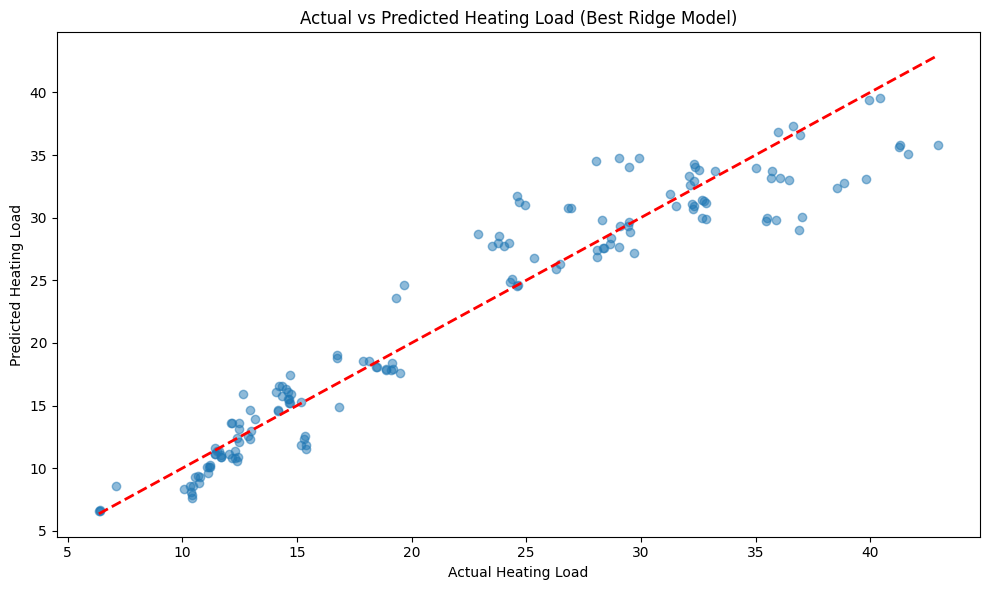

In [ ]:
# Evaluate the best model on the test set
y_test_pred = best_model.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)

# Calculate Normalized Mean Squared Error (NMSE)
y_test_mean = np.mean(y_test)
test_nmse = test_mse / np.mean((y_test - y_test_mean)**2)

# Print the results
print("Final Evaluation on Test Data:")
print(f"R2 score: {test_r2:.4f}")
print(f"Mean Squared Error: {test_mse:.4f}")
print(f"Root Mean Squared Error: {test_rmse:.4f}")
print(f"Normalized Mean Squared Error: {test_nmse:.4f}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load (Best Ridge Model)")
plt.tight_layout()
plt.show()

####**4. What are the best model’s coefficients, intercept, and its training, validation, and test accuracy?**

In [ ]:
# Print the best model's coefficients and intercept
print("4. Best Model's Coefficients, Intercept, and Accuracies:")
print("\nCoefficients:")
for feature, coef in zip(X.columns, best_model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\nIntercept: {best_model.intercept_:.4f}")

# Calculate and print accuracies
y_train_pred = best_model.predict(X_train)
y_val_pred = best_model.predict(X_val)
y_test_pred = best_model.predict(X_test)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nModel Accuracy (R2 Score):")
print(f"Training Accuracy: {train_r2:.4f}")
print(f"Validation Accuracy: {val_r2:.4f}")
print(f"Test Accuracy: {test_r2:.4f}")

4. Best Model's Coefficients, Intercept, and Accuracies:

Coefficients:
X1: -59.8421
X2: -0.0572
X3: 0.0369
X4: -0.0470
X5: 4.1622
X6: -0.0181
X7: 20.1603
X8: 0.2442

Intercept: 75.6626

Model Accuracy (R2 Score):
Training Accuracy: 0.9182
Validation Accuracy: 0.9050
Test Accuracy: 0.9196


####**5. What are the top 5 features among X1 to X8?**

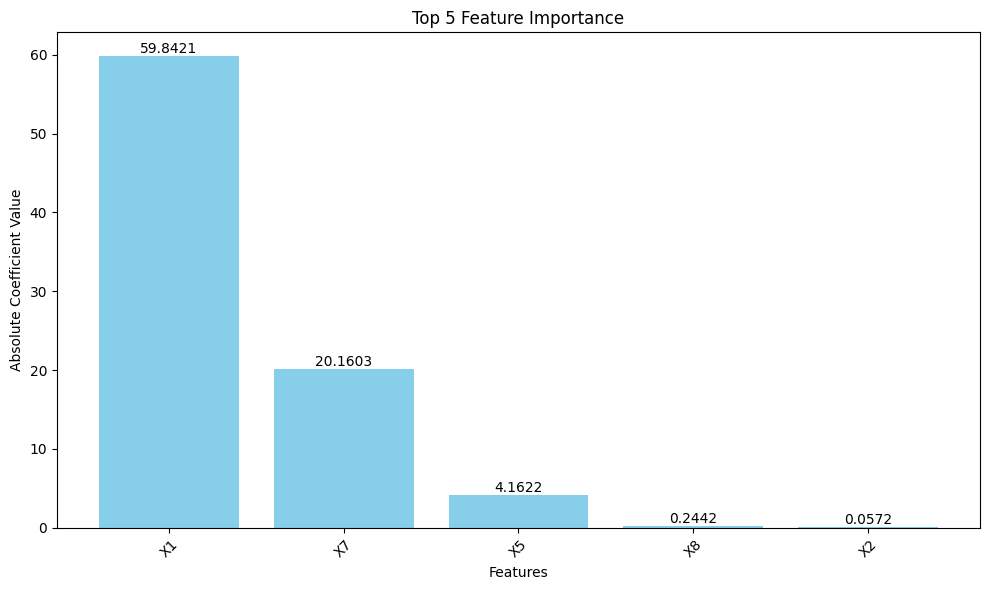


Percentage of Total Importance:
X1: 70.76%
X7: 23.84%
X5: 4.92%
X8: 0.29%
X2: 0.07%

Model Performance Metrics:
Mean Squared Error (MSE): 8.5558
R² Score: 0.9159


In [ ]:
# Get the absolute values of the coefficients
coef_abs = np.abs(best_model.coef_)

# Create a list of tuples containing feature names and their corresponding absolute coefficient values
feature_importance = list(zip(X.columns, coef_abs))

# Sort the list by coefficient values in descending order
feature_importance.sort(key=lambda x: x[1], reverse=True)

# Check if there are at least 5 features
num_features = len(feature_importance)
if num_features < 5:
    raise ValueError("There are fewer than 5 features available.")

# Prepare data for visualization
features, importances = zip(*feature_importance[:5])

# Visualize feature importance
plt.figure(figsize=(10, 6))
bars = plt.bar(features, importances, color='skyblue')
plt.title("Top 5 Feature Importance")
plt.xlabel("Features")
plt.ylabel("Absolute Coefficient Value")
plt.xticks(rotation=45)

# Annotate the bars with the coefficient values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.4f}', ha='center', va='bottom')

plt.tight_layout()

# Save the visualization as an image
plt.savefig("top_5_feature_importance.png")
plt.show()

# Calculate the percentage of total importance for each feature
total_importance = sum(coef_abs)
percentage_importance = [(feature, (importance / total_importance) * 100) for feature, importance in feature_importance[:5]]

# Print percentage of total importance
print("\nPercentage of Total Importance:")
for feature, percentage in percentage_importance:
    print(f"{feature}: {percentage:.2f}%")

# Model performance metrics
y_true = y
y_pred = best_model.predict(X)

# Calculate and print performance metrics
mse = mean_squared_error(y_true, y_pred)
r_squared = r2_score(y_true, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r_squared:.4f}")

####**6. If you repeat the procedure above using only the 5 top features, what are the results?**

Training set shape: (460, 5)
Validation set shape: (154, 5)
Testing set shape: (154, 5)
Best alpha (top 5 features): 0.0001
Best R2 score on validation set (top 5 features): 0.8988
R2 score on test set (top 5 features): 0.9071
Mean squared error on test set (top 5 features): 9.1265
Root mean squared error on test set (top 5 features): 3.0210
Normalized mean squared error on test set (top 5 features): 0.0929


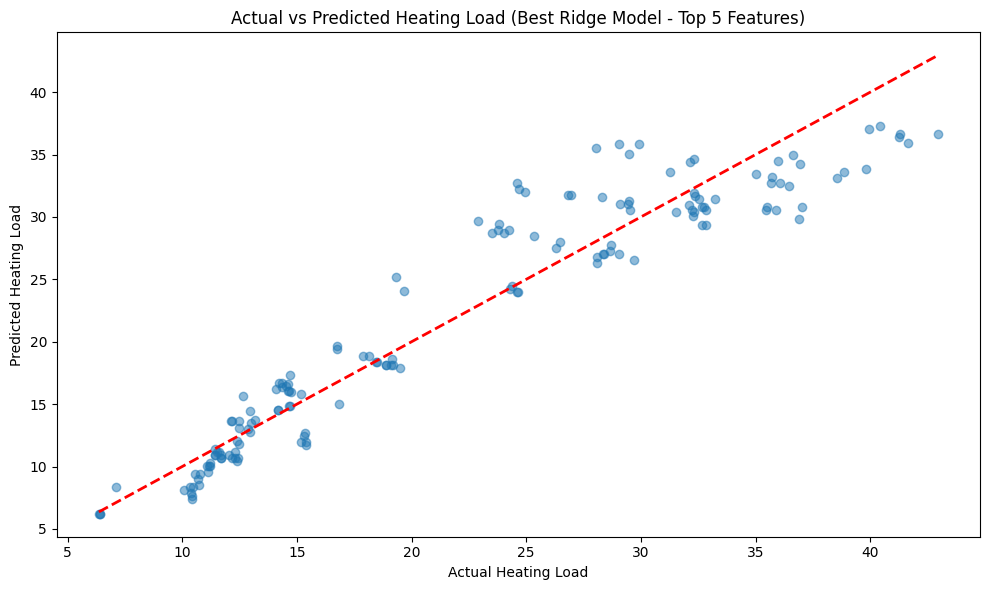

Best Model's Coefficients, Intercept, and Accuracies (Top 5 Features):

Coefficients:
X1: -6.5653
X7: 20.4379
X5: 7.0270
X8: 0.2470
X2: 0.0376

Intercept: -40.4291

Model Accuracy (R2 Score) - Top 5 Features:
Training Accuracy: 0.9089
Validation Accuracy: 0.8988
Test Accuracy: 0.9071


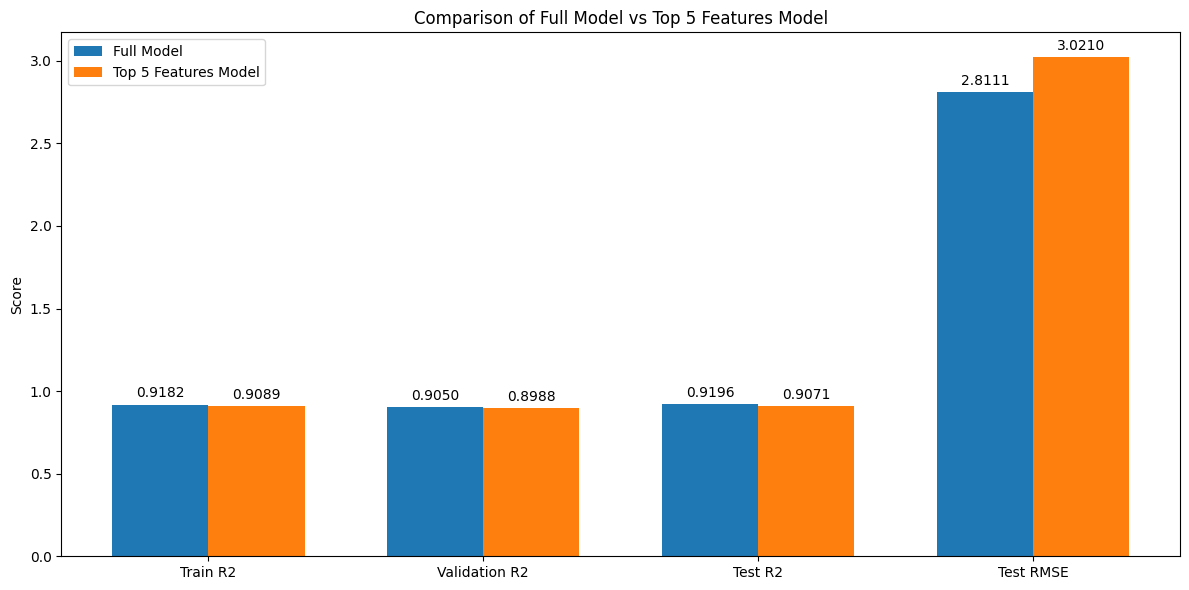

In [ ]:
# 6. Repeat the procedure using only the top 5 features

# Select the top 5 features
top_5_features = [feature for feature, _ in feature_importance[:5]]
X_top5 = X[top_5_features]

# Split data into train, validation, and test sets (60%, 20%, 20%)
X_train_top5, X_temp_top5, y_train, y_temp = train_test_split(X_top5, y, test_size=0.4, random_state=42)
X_val_top5, X_test_top5, y_val, y_test = train_test_split(X_temp_top5, y_temp, test_size=0.5, random_state=42)

print("Training set shape:", X_train_top5.shape)
print("Validation set shape:", X_val_top5.shape)
print("Testing set shape:", X_test_top5.shape)

# Train Ridge regression with different regularization parameters
alphas = np.logspace(-4, 4, 10)
best_alpha_top5 = None
best_r2_top5 = -float('inf')
best_model_top5 = None

for alpha in alphas:
    model = Ridge(alpha=alpha)
    model.fit(X_train_top5, y_train)

    y_val_pred = model.predict(X_val_top5)
    r2 = r2_score(y_val, y_val_pred)

    if r2 > best_r2_top5:
        best_r2_top5 = r2
        best_alpha_top5 = alpha
        best_model_top5 = model

print(f"Best alpha (top 5 features): {best_alpha_top5}")
print(f"Best R2 score on validation set (top 5 features): {best_r2_top5:.4f}")

# Evaluate the best model on the test set
y_test_pred_top5 = best_model_top5.predict(X_test_top5)
test_r2_top5 = r2_score(y_test, y_test_pred_top5)
test_mse_top5 = mean_squared_error(y_test, y_test_pred_top5)
test_rmse_top5 = np.sqrt(test_mse_top5)

# Calculate Normalized Mean Squared Error (NMSE)
y_test_mean_top5 = np.mean(y_test)
test_nmse_top5 = test_mse_top5 / np.mean((y_test - np.mean(y_test))**2)

print(f"R2 score on test set (top 5 features): {test_r2_top5:.4f}")
print(f"Mean squared error on test set (top 5 features): {test_mse_top5:.4f}")
print(f"Root mean squared error on test set (top 5 features): {test_rmse_top5:.4f}")
print(f"Normalized mean squared error on test set (top 5 features): {test_nmse_top5:.4f}")

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_top5, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual Heating Load")
plt.ylabel("Predicted Heating Load")
plt.title("Actual vs Predicted Heating Load (Best Ridge Model - Top 5 Features)")
plt.tight_layout()
plt.show()

# Print the best model's coefficients and intercept
print("Best Model's Coefficients, Intercept, and Accuracies (Top 5 Features):")
print("\nCoefficients:")
for feature, coef in zip(top_5_features, best_model_top5.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\nIntercept: {best_model_top5.intercept_:.4f}")

# Calculate and print accuracies
y_train_pred_top5 = best_model_top5.predict(X_train_top5)
y_val_pred_top5 = best_model_top5.predict(X_val_top5)
y_test_pred_top5 = best_model_top5.predict(X_test_top5)

train_r2_top5 = r2_score(y_train, y_train_pred_top5)
val_r2_top5 = r2_score(y_val, y_val_pred_top5)
test_r2_top5 = r2_score(y_test, y_test_pred_top5)

print("\nModel Accuracy (R2 Score) - Top 5 Features:")
print(f"Training Accuracy: {train_r2_top5:.4f}")
print(f"Validation Accuracy: {val_r2_top5:.4f}")
print(f"Test Accuracy: {test_r2_top5:.4f}")

metrics = ['Train R2', 'Validation R2', 'Test R2', 'Test RMSE']
full_model = [train_r2, val_r2, test_r2, test_rmse]
top5_model = [train_r2_top5, val_r2_top5, test_r2_top5, test_rmse_top5]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, full_model, width, label='Full Model')
rects2 = ax.bar(x + width/2, top5_model, width, label='Top 5 Features Model')

ax.set_ylabel('Score')
ax.set_title('Comparison of Full Model vs Top 5 Features Model')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

#**GUIDED QUESTIONS**:
You are expected to answer the following questions using your analysis:


---



####**1. What is the impact of removing certain features on the model’s performance?**

Eliminating any features from the linear regression model could potentially alter its performance based on the strength of relevance between that feature and the model in question. Consider the case when there is a set of influential features to describe the heating load variable that is being aimed to be explained by the model. Its performance then would become much less reliable and precise to make further good predictions. A diminishment of some minor impacts on such features could be able to enhance it through noise reduction and also through a reduction in complexity for a simple yet potent model.

####**2. Why is it necessary to split the data into training, validation, and testing sets? What could happen if this step is skipped?**

One could ensure appropriate training and objective evaluation of the model by splitting data into training, validation, and testing sets. While data from the training set is used to learn model parameters, the validation set is used in tuning hyperparameters such as regularization strength; the test set provides an unbiased evaluation of the final model. Skipping this step may result in overfitting, meaning the model performs well on training data but poorly on new, unseen data because it does not generalize well.

####**3. How can the generalization ability of the model be assessed using the test data? What steps would you take to ensure the model generalizes well to unseen data?**


It can be generalized based on the model performance in terms of test data not seen either during training or validation. It finds out how well the model can cope up with unseen data. So, it requires cross-validation, ridge regularization, and monitoring of validation metrics to ensure good generalization.
